# Intro

In this notebook, we aim to merge multiple datasets into one df in order to do further analysis.

We aim to get the 'text' column of what we will be labelling as `text_df` , append a date via the `date_df`.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Datasets

**Including Text**

https://www.kaggle.com/datasets/michaelrussell4/10000-books-and-their-genres-standardized

In [2]:
text_df = pd.read_csv('datasets/books_and_genres.csv')

**Including Publication Date**

https://www.kaggle.com/datasets/saurabhbagchi/books-dataset

In [3]:
date_df = pd.read_csv('datasets/books.csv', encoding='ISO-8859-1', on_bad_lines='skip', sep=';', dtype={'Year-Of-Publication': 'str'})

# Basic Overview

In [4]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10635 non-null  int64 
 1   title       10635 non-null  object
 2   text        10373 non-null  object
 3   genres      10635 non-null  object
dtypes: int64(1), object(3)
memory usage: 332.5+ KB


In [5]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


# Checking for missing data, dropping missing text

In [6]:
print(text_df.isnull().sum(), '\n\n', date_df.isnull().sum())

Unnamed: 0      0
title           0
text          262
genres          0
dtype: int64 

 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


From the above, we see 262 rows are missing `text` , and no `Year of Publication` is missing.

We will delete the rows where text is missing.

We also see 2 entries where `Book-Author` is missing.

In [7]:
text_df = text_df.dropna(subset=['text'])
date_df = date_df.dropna(subset=['Book-Author'])

# Dropping Unnecessary Columns

In [8]:
text_df = text_df.drop(columns=['Unnamed: 0'])

In [9]:
date_df = date_df.drop(columns=['ISBN', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

In [10]:
print(text_df.isnull().sum(), '\n\n', date_df.isnull().sum())

title     0
text      0
genres    0
dtype: int64 

 Book-Title             0
Book-Author            0
Year-Of-Publication    0
dtype: int64


# Merging `text_df` and `date_df`

In [11]:
# Renaming the column in date_df to match text_df
date_df.rename(columns={'Book-Title': 'title'}, inplace=True)

In [12]:
# Convert the 'title' column in both DataFrames to lowercase
text_df['title'] = text_df['title'].str.lower()
date_df['title'] = date_df['title'].str.lower()

In [13]:
novel_df = pd.merge(text_df, date_df, on='title', how='inner')

In [14]:
novel_df

,title,text,genres,Book-Author,Year-Of-Publication
0,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...","Hodgson, William Hope",2003
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...",William Hope Hodgson,1996
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '...",Sol Yurick,2003
3,carmilla,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'romance', 'novella', 'historical-fiction', '...",Joseph Sheridan Le Fanu,0
4,carmilla,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'romance', 'novella', 'historical-fiction', '...",Joseph Sheridan Le Fanu,2003
...,...,...,...,...,...
2736,undertow,Produced by Charles Franks and the Online Dist...,"{'romance', 'contemporary', 'amazon', 'fiction...",Sally Helen Reid,1992
2737,undertow,Produced by Charles Franks and the Online Dist...,"{'romance', 'contemporary', 'amazon', 'fiction...",Drake Douglas,1987
2738,undertow,Produced by Charles Franks and the Online Dist...,"{'romance', 'contemporary', 'amazon', 'fiction...",Amy Schutzer,2000
2739,winding paths,This Etext was prepared by w.debeuf@belgacom.n...,"{'classics', 'love'}",Bruce Chatwin,1999


# EDA into novel_df

We'll be doing a EDA on the merged, `novel_df` , to determine how the data looks like.

## Year of Publicatoin

`Year-Of-Publication` is considered an object. We are going to convert it into a numerical.

In [19]:
# Convert 'Year-Of-Publication' to numeric, ignoring errors ('coerce' turns errors into NaN)
novel_df['Year-Of-Publication'] = pd.to_numeric(novel_df['Year-Of-Publication'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                2741 non-null   object
 1   text                 2741 non-null   object
 2   genres               2741 non-null   object
 3   Book-Author          2741 non-null   object
 4   Year-Of-Publication  2741 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 107.2+ KB


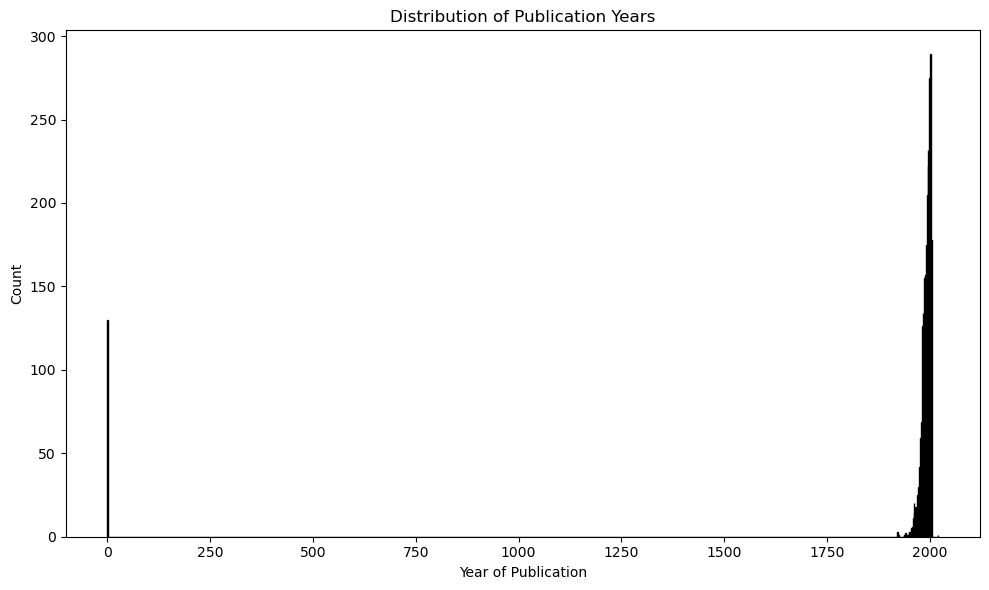

In [24]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.hist(novel_df['Year-Of-Publication'], bins=1000, color='skyblue', edgecolor='black')
plt.title('Distribution of Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.tight_layout()  # Adjust the layout to make room for the plot labels
plt.show()

In [25]:
# Drop rows where 'Year-Of-Publication' is less than 1900
novel_df = novel_df[novel_df['Year-Of-Publication'] >= 1900]

# Reset index if necessary
novel_df.reset_index(drop=True, inplace=True)

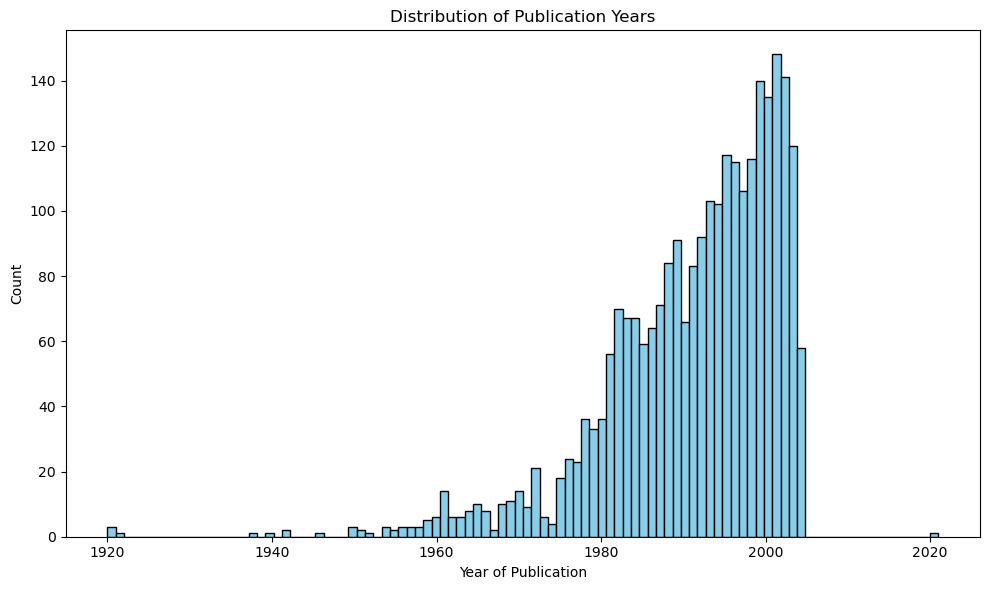

In [26]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.hist(novel_df['Year-Of-Publication'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.tight_layout()  # Adjust the layout to make room for the plot labels
plt.show()

In [27]:
novel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                2611 non-null   object
 1   text                 2611 non-null   object
 2   genres               2611 non-null   object
 3   Book-Author          2611 non-null   object
 4   Year-Of-Publication  2611 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 102.1+ KB


In [28]:
novel_df.shape

(2611, 5)

# Looking into non-year features